In [ ]:

print("21bds0149")
import pandas as pd
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/wages.csv"
df = pd.read_csv(url)


df.info()


21bds0149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6402 entries, 0 to 6401
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rownames       6402 non-null   int64  
 1   id             6402 non-null   int64  
 2   lnw            6402 non-null   float64
 3   exper          6402 non-null   float64
 4   ged            6402 non-null   int64  
 5   postexp        6402 non-null   float64
 6   black          6402 non-null   int64  
 7   hispanic       6402 non-null   int64  
 8   hgc            6402 non-null   int64  
 9   hgc.9          6402 non-null   int64  
 10  uerate         6402 non-null   float64
 11  ue.7           6000 non-null   float64
 12  ue.centert1    5996 non-null   float64
 13  ue.mean        6402 non-null   float64
 14  ue.person.cen  6402 non-null   float64
 15  ue1            6402 non-null   float64
dtypes: float64(9), int64(7)
memory usage: 800.4 KB


In [ ]:
df.head()

rownames  id    lnw  exper  ged  postexp  black  hispanic  hgc  hgc.9  \
0         1  31  1.491  0.015    1    0.015      0         1    8     -1   
1         2  31  1.433  0.715    1    0.715      0         1    8     -1   
2         3  31  1.469  1.734    1    1.734      0         1    8     -1   
3         4  31  1.749  2.773    1    2.773      0         1    8     -1   
4         5  31  1.931  3.927    1    3.927      0         1    8     -1   

   uerate   ue.7  ue.centert1  ue.mean  ue.person.cen   ue1  
0    3.21 -3.785         0.00     3.21           0.00  3.21  
1    3.21 -3.785         0.00     3.21           0.00  3.21  
2    3.21 -3.785         0.00     3.21           0.00  3.21  
3    3.30 -3.705         0.08     3.21           0.08  3.21  
4    2.89 -4.105        -0.32     3.21          -0.32  3.21

In [ ]:
df.describe()

# Check for missing values
df.isnull().sum()


rownames           0
id                 0
lnw                0
exper              0
ged                0
postexp            0
black              0
hispanic           0
hgc                0
hgc.9              0
uerate             0
ue.7             402
ue.centert1      406
ue.mean            0
ue.person.cen      0
ue1                0
dtype: int64

In [ ]:

print(f"Number of duplicate entries: {df.duplicated().sum()}")

# Display column-wise unique values to understand categorical features
for column in df.columns:
    print(f"{column} unique values:\n", df[column].unique(), "\n")

Number of duplicate entries: 0
rownames unique values:
 [   1    2    3 ... 6400 6401 6402] 

id unique values:
 [   31    36    53   122   134   145   155   173   206   207   222   223
   226   234   241   248   253   266   295   299   304   313   315   316
   324   329   331   332   336   356   378   394   396   411   415   419
   470   477   517   518   534   535   537   540   541   592   594   597
   629   630   641   674   675   700   714   735   737   741   767   832
   871   911  1027  1028  1032  1042  1043  1089  1134  1150  1153  1204
  1205  1211  1217  1219  1243  1257  1273  1282  1284  1300  1314  1316
  1317  1329  1330  1383  1387  1405  1417  1420  1431  1434  1450  1452
  1456  1464  1466  1508  1515  1535  1536  1537  1542  1543  1569  1578
  1580  1595  1627  1663  1667  1672  1679  1682  1687  1692  1693  1695
  1731  1741  1743  1755  1764  1772  1811  1812  1813  1821  1822  1823
  1827  1931  1970  1991  1992  2001  2026  2031  2051  2059  2065  2090
  2091  209

UNIVARIATE ANALYSIS


AttributeError: module 'matplotlib' has no attribute 'show'

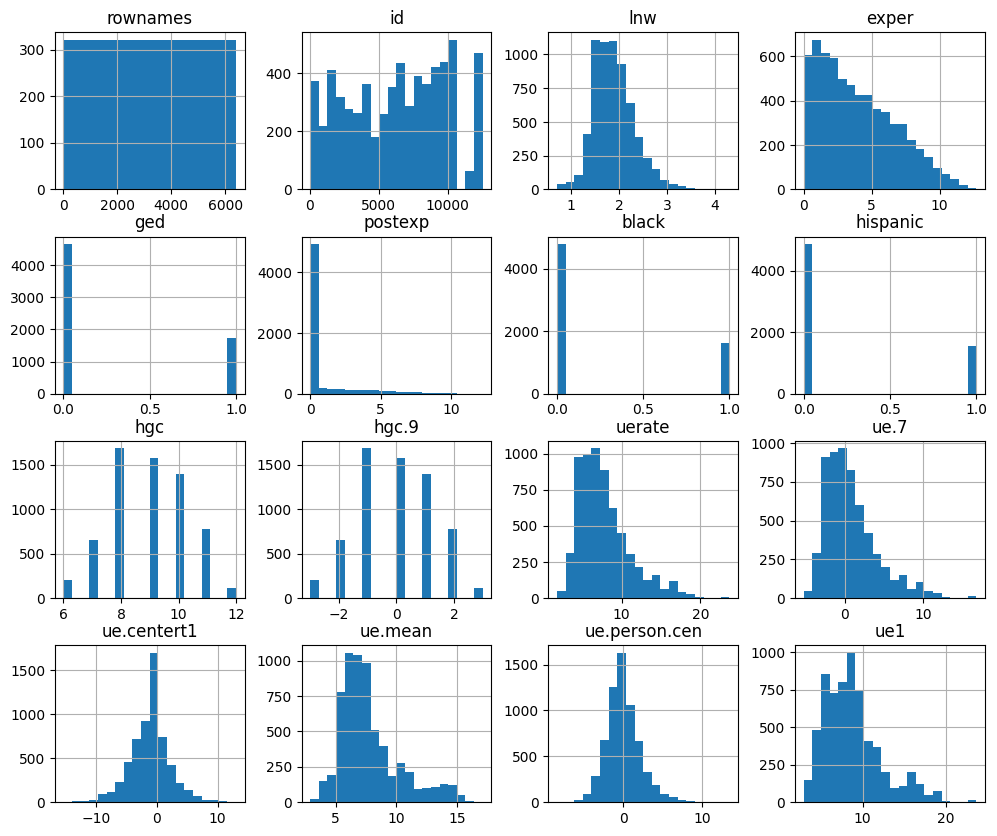

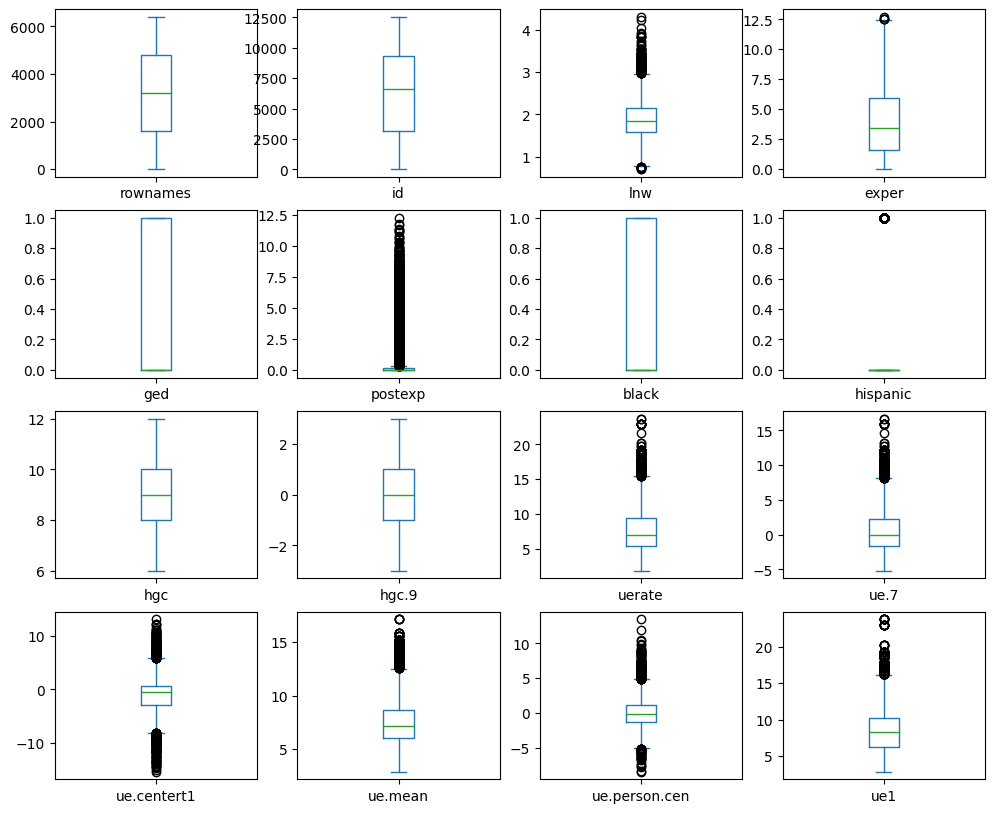

In [ ]:
import matplotlib as plt
df.hist(figsize=(12, 10), bins=20)


# Boxplots for numerical features
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12, 10), sharex=False, sharey=False)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Changed import statement

# List of categorical features (add columns that seem to be categorical based on your data)
categorical_columns = ['black', 'hispanic', 'ged', 'hg']  # Example, modify based on actual dataset

# Count plot for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

Multivariate analysis

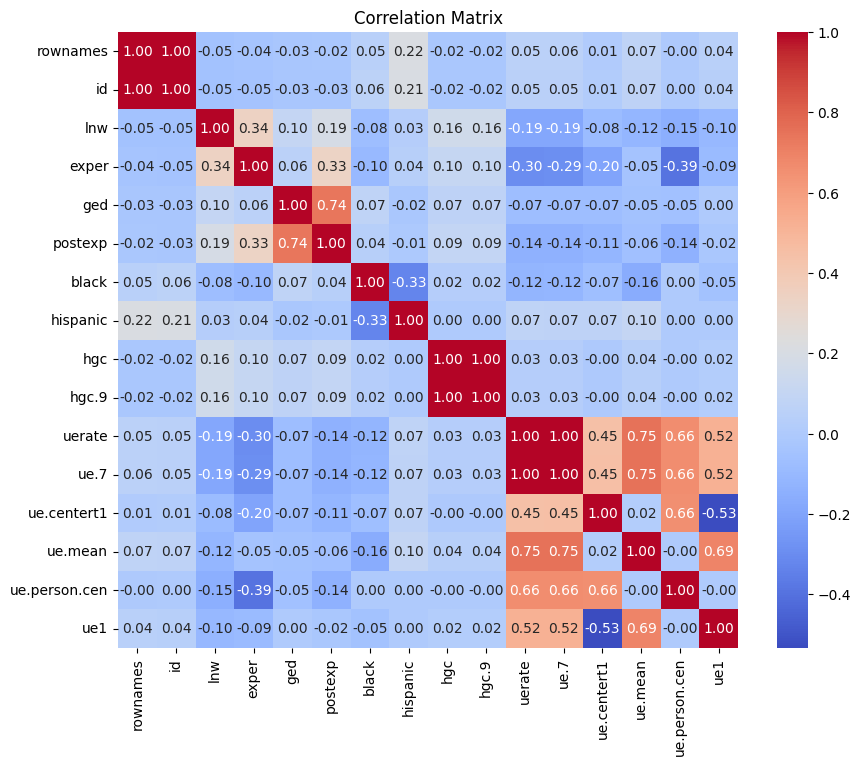

In [22]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


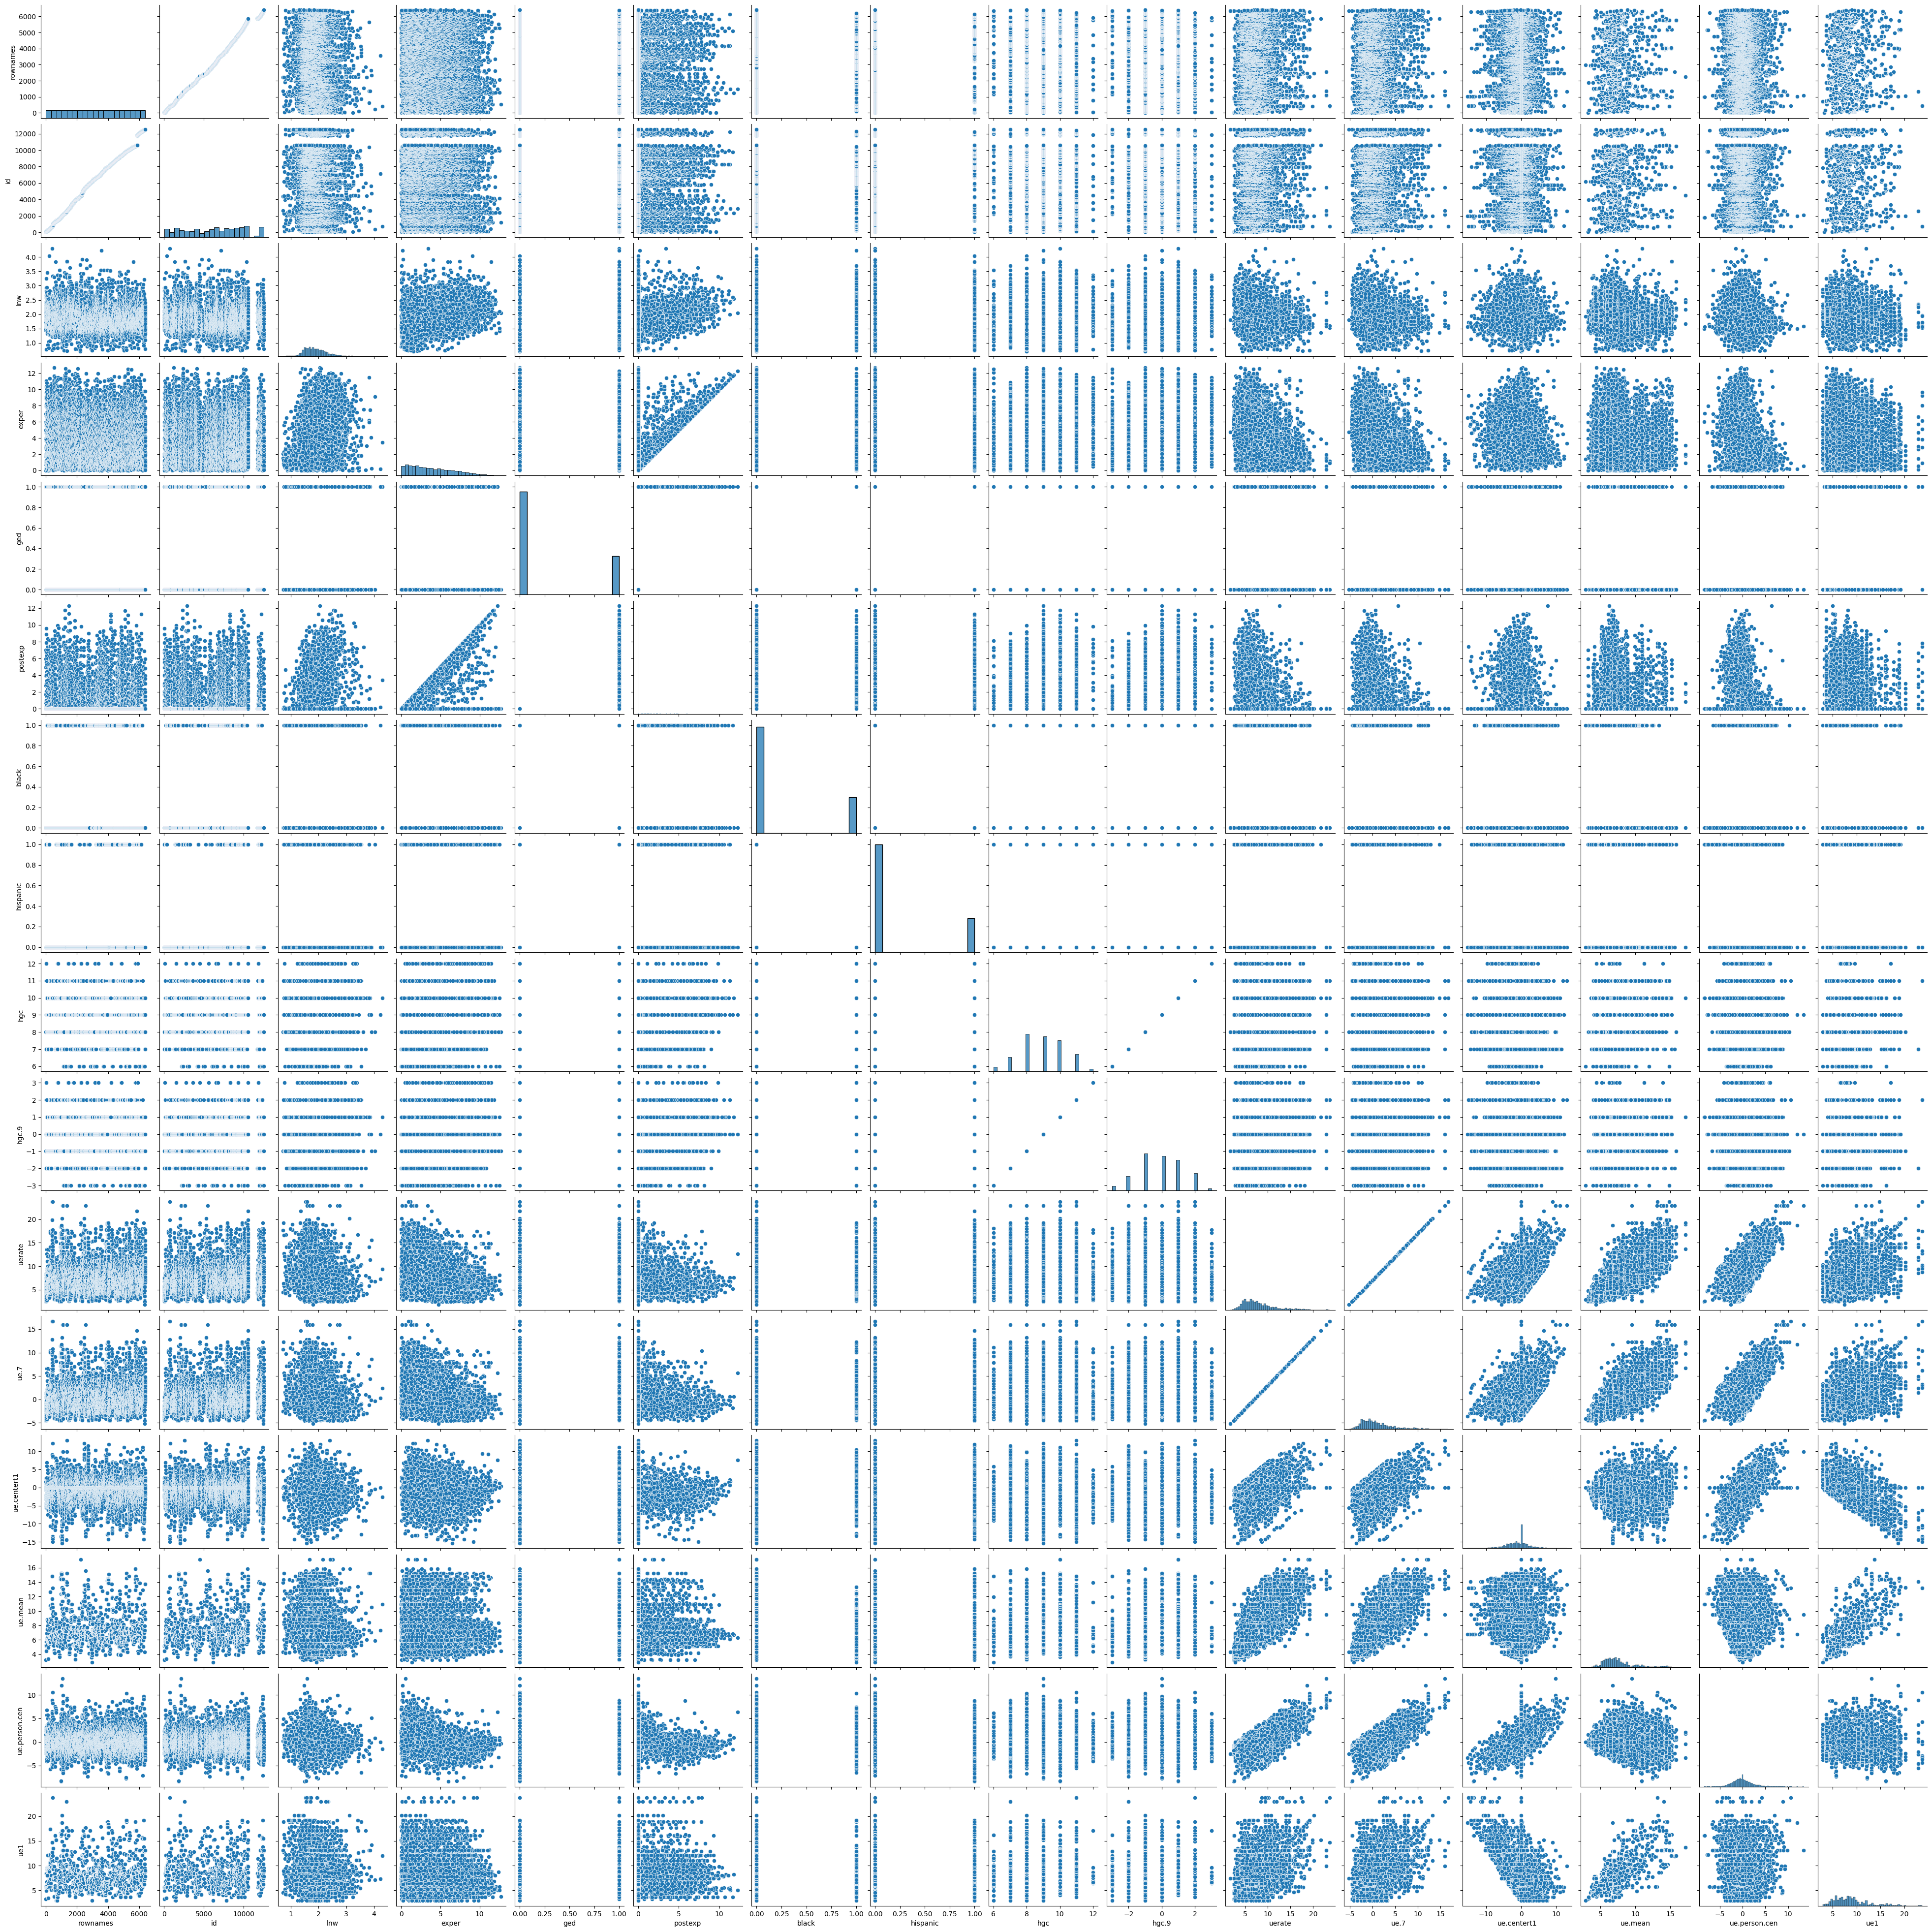

In [19]:
# Pairplot for numerical features (may take some time if the dataset is large)
sns.pairplot(df)
plt.show()


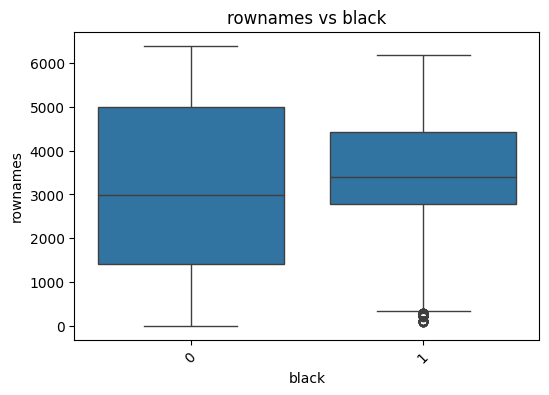

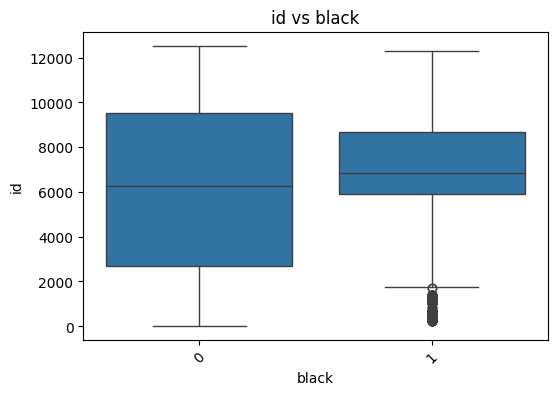

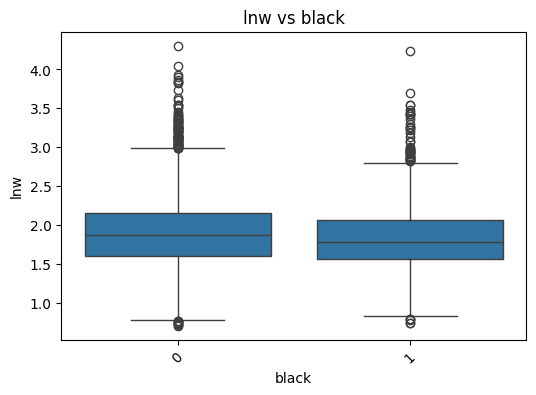

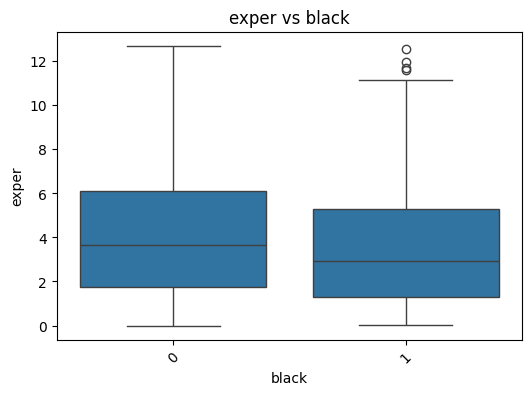

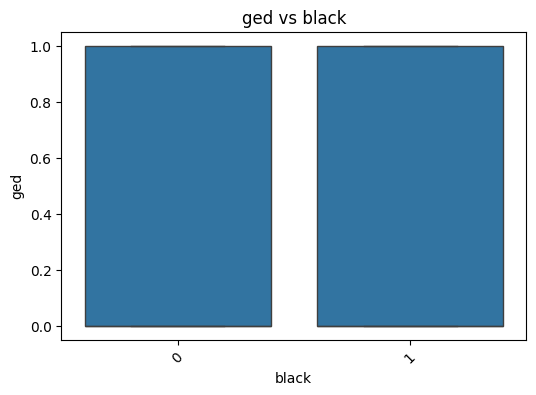

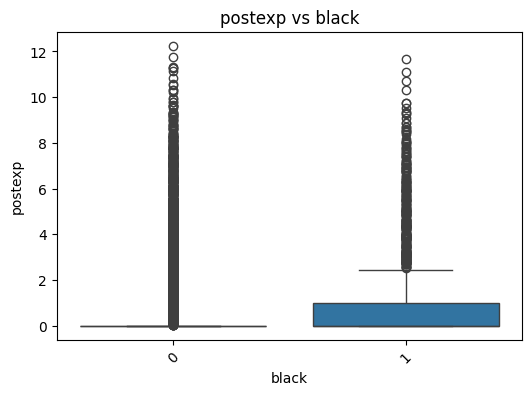

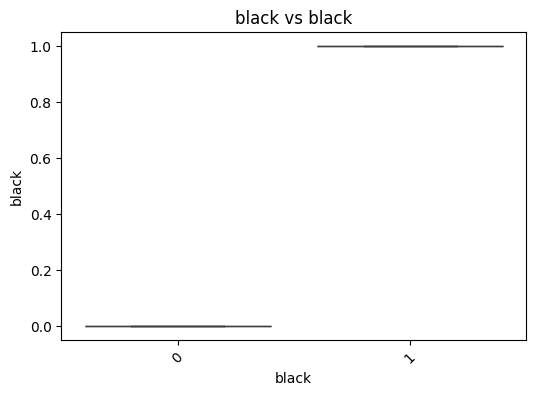

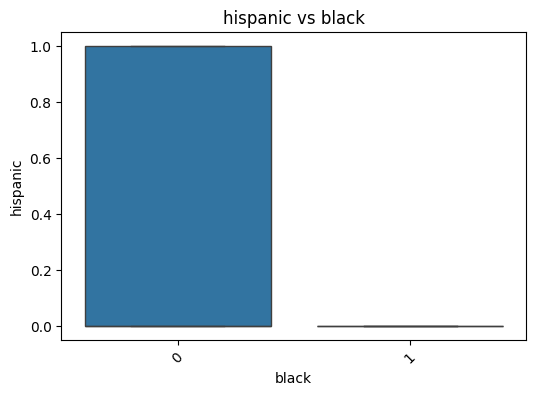

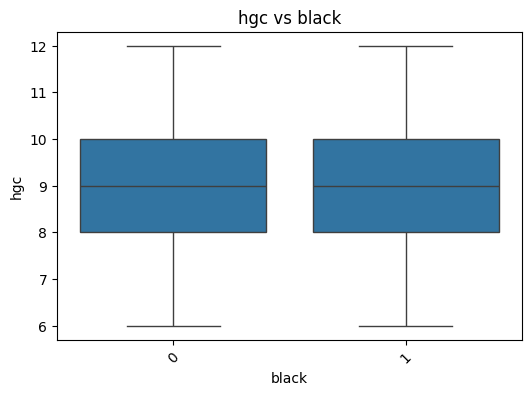

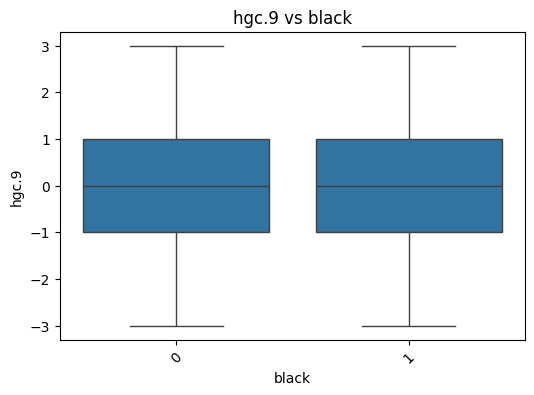

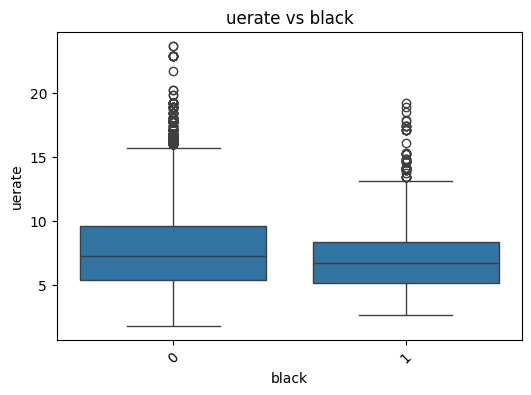

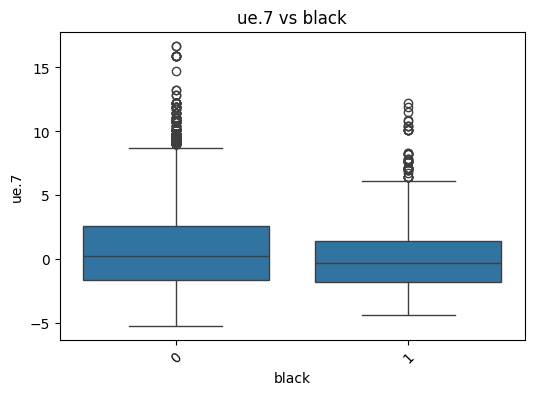

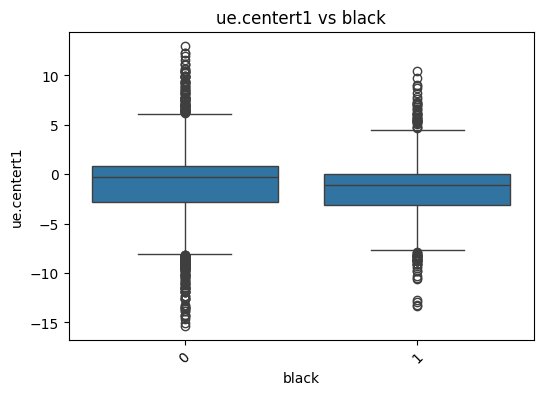

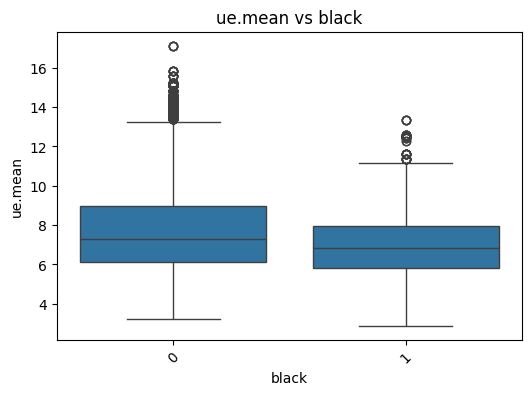

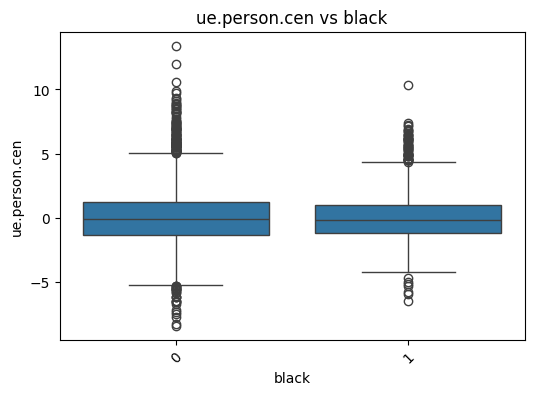

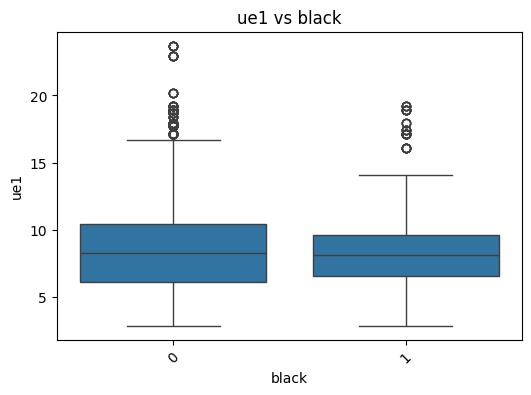

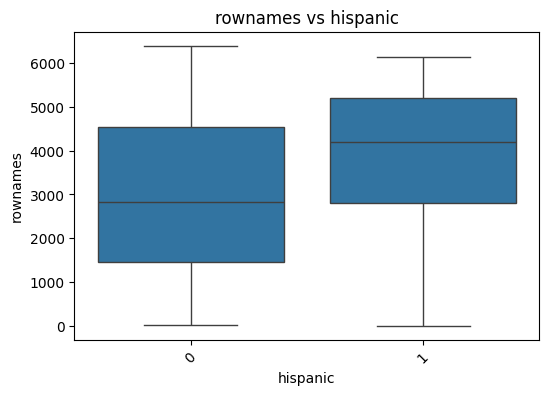

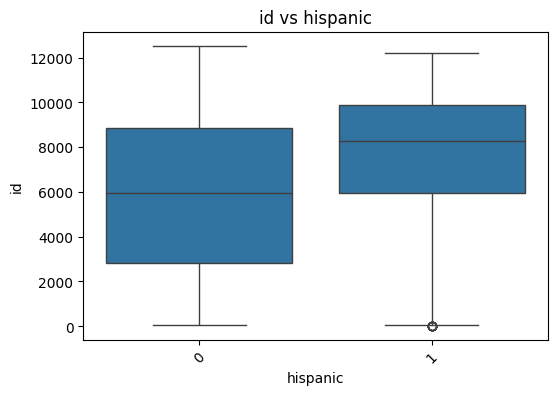

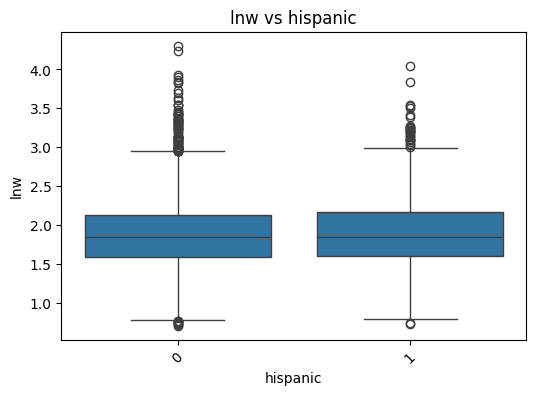

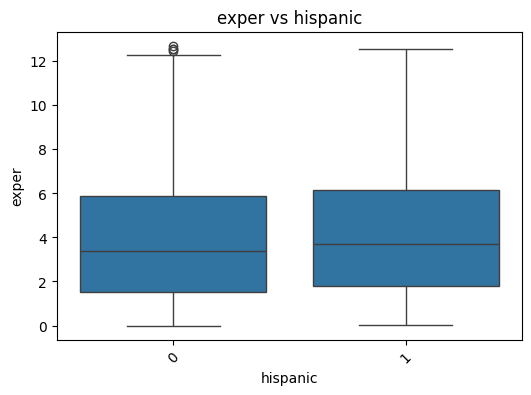

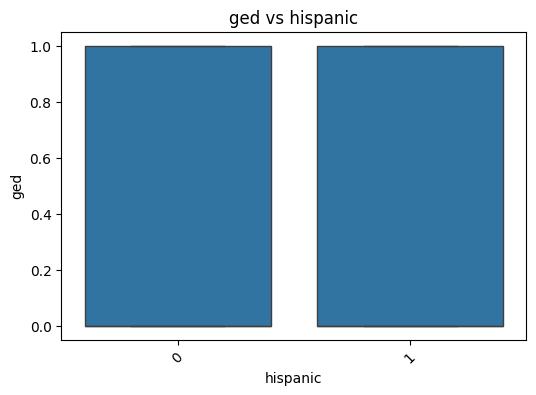

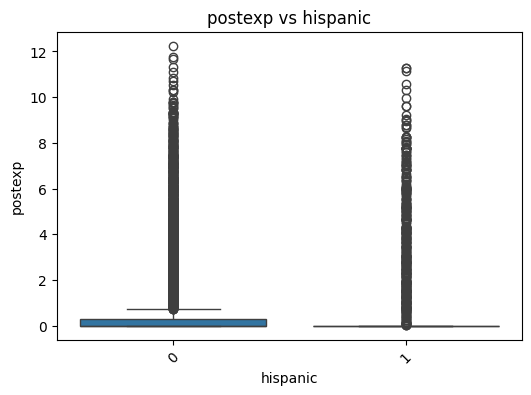

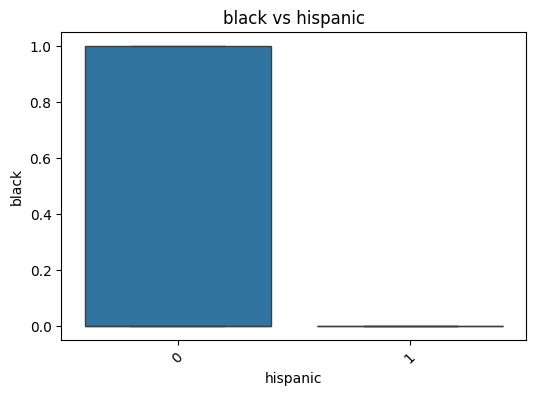

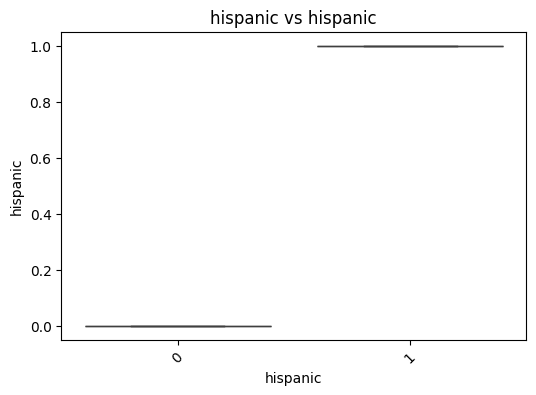

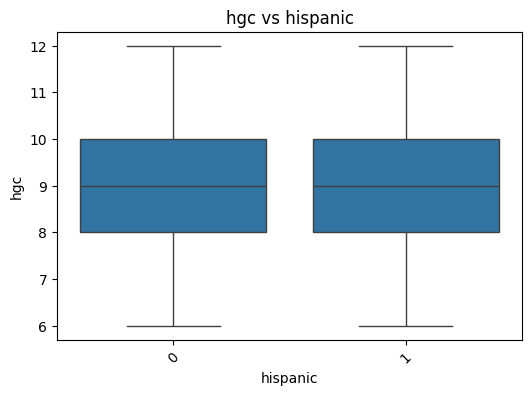

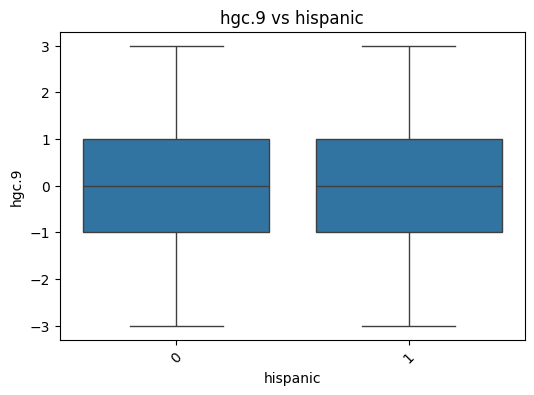

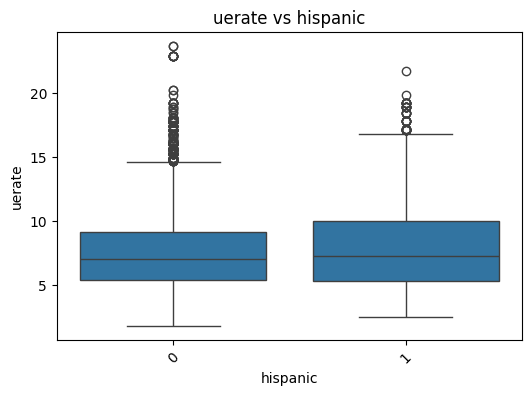

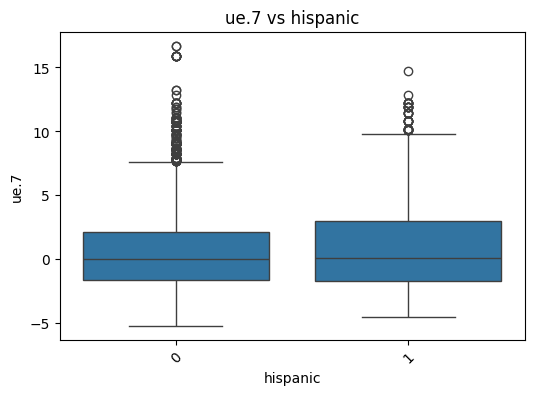

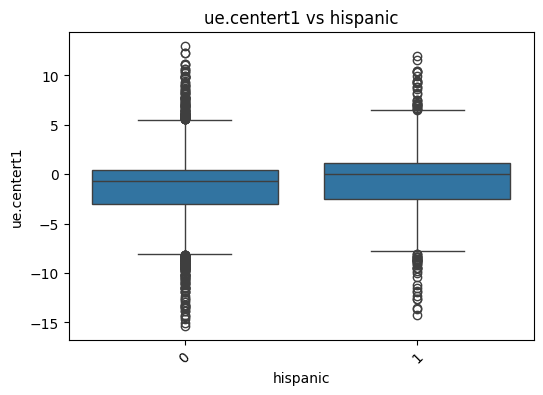

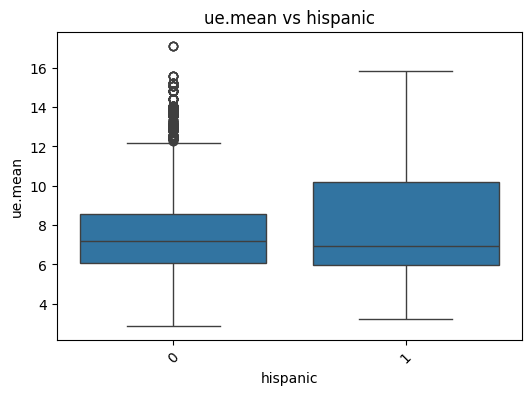

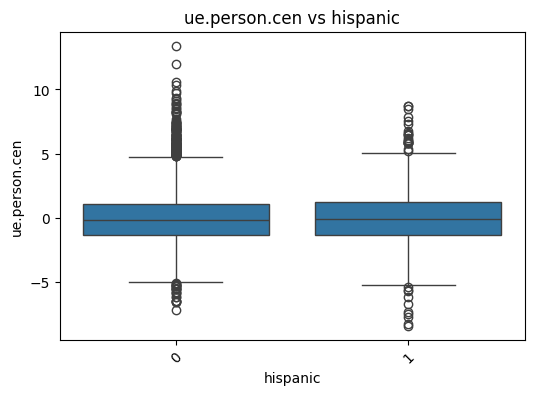

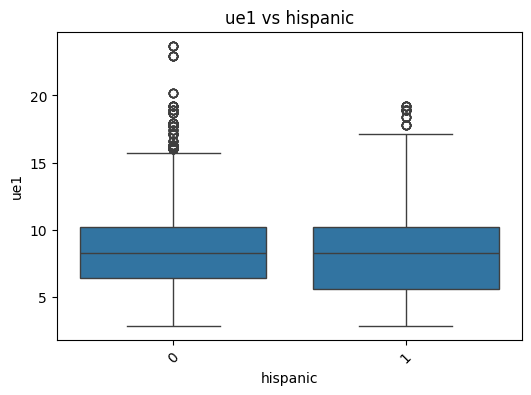

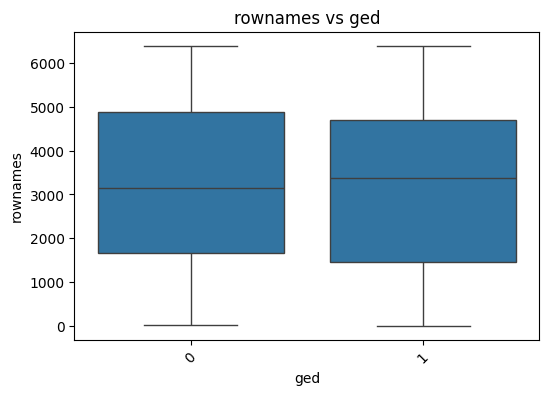

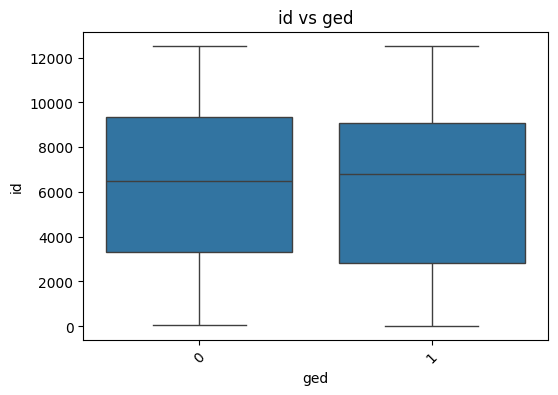

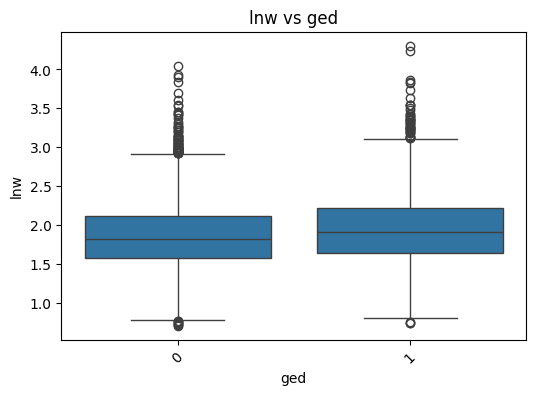

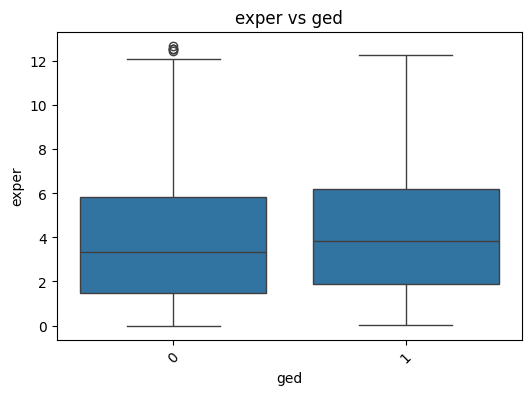

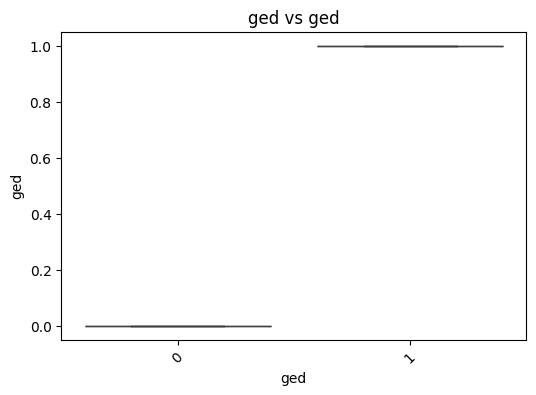

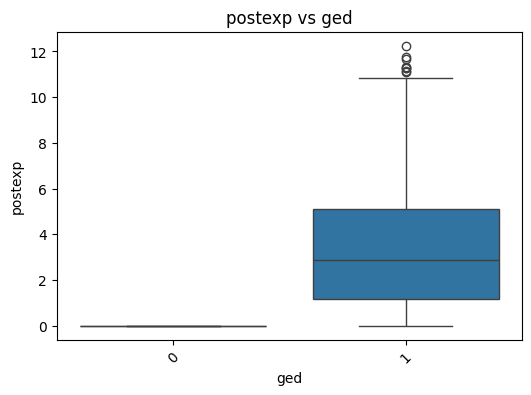

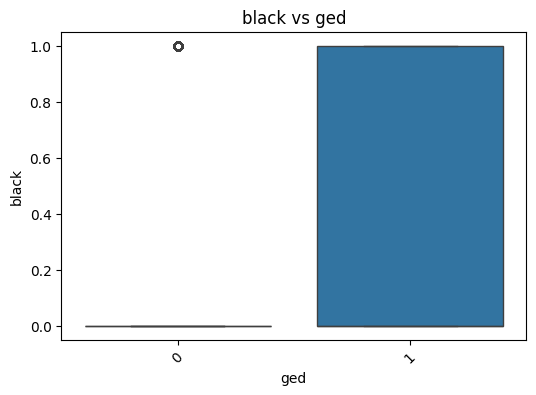

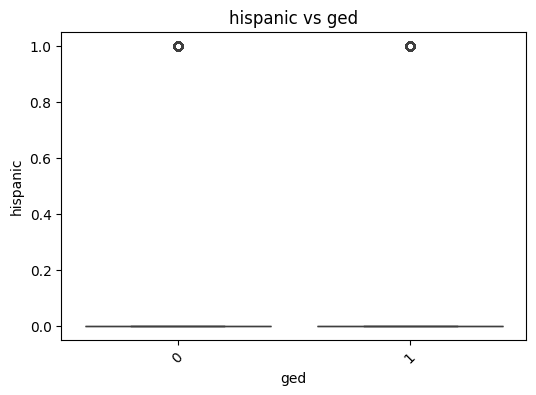

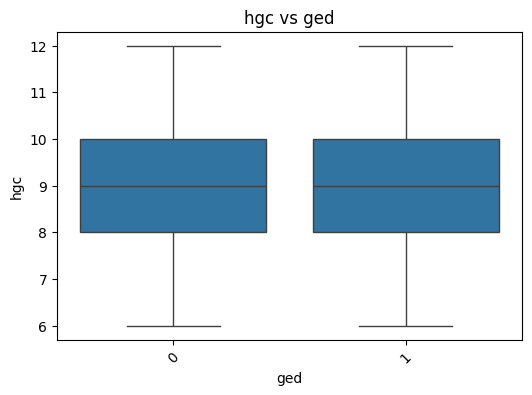

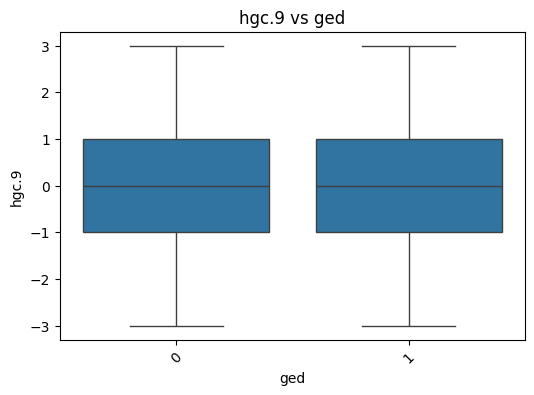

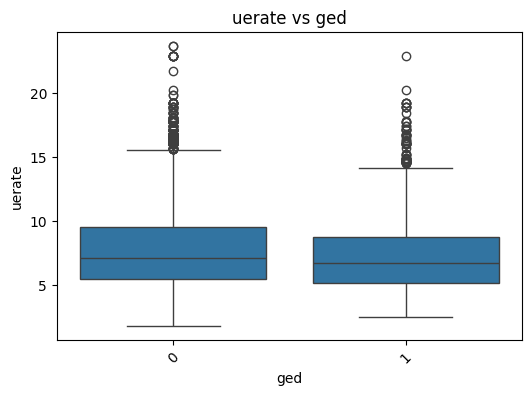

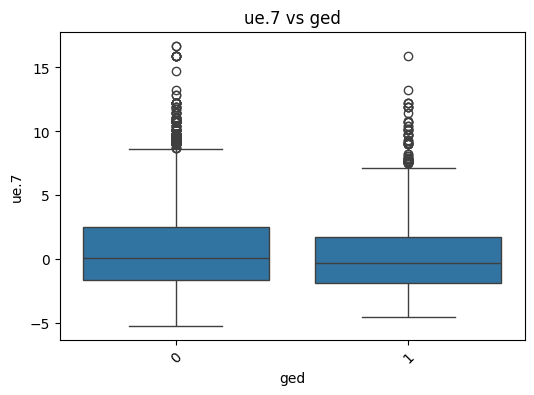

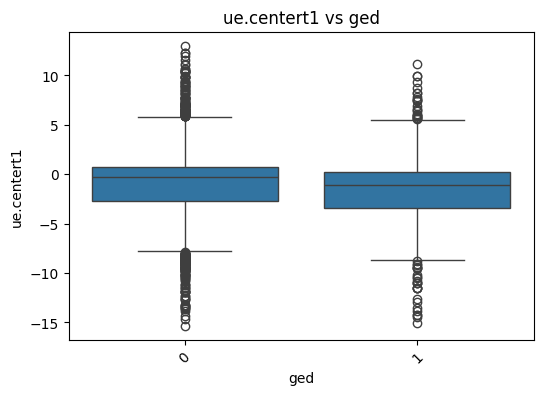

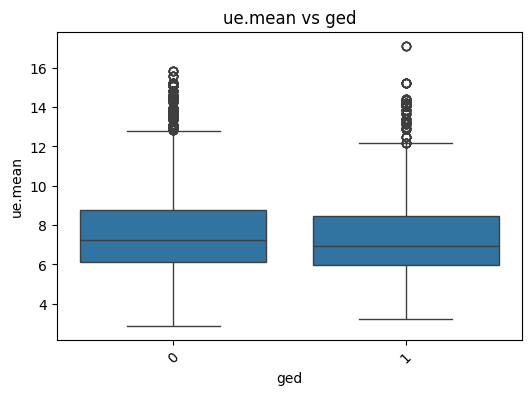

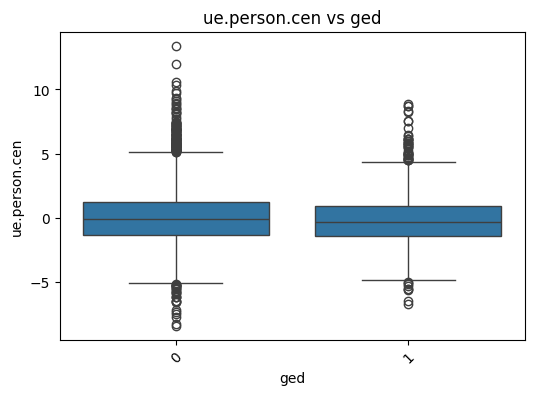

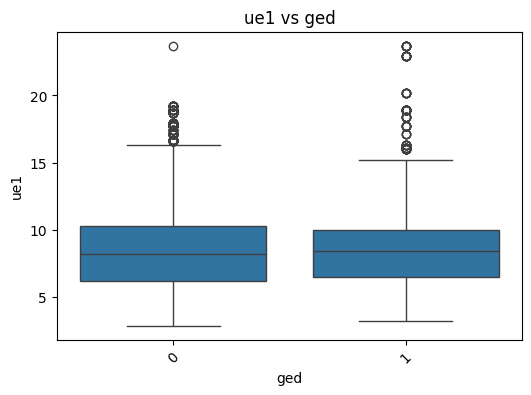

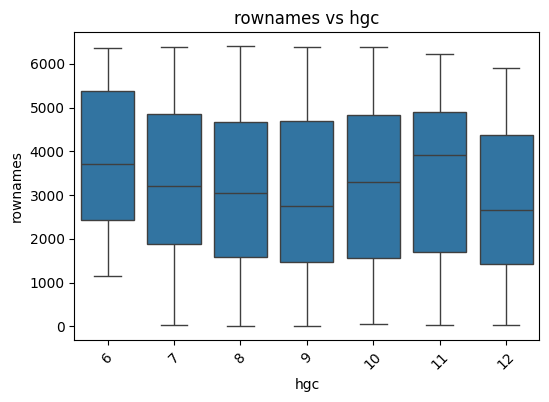

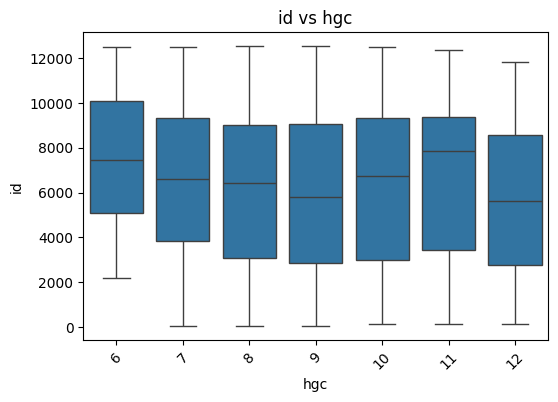

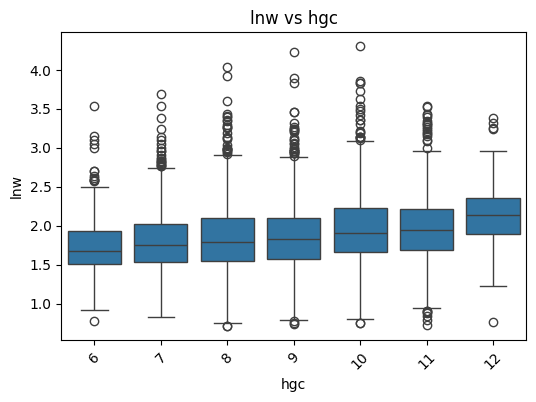

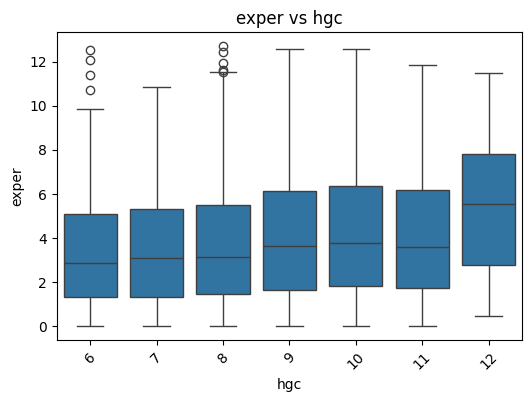

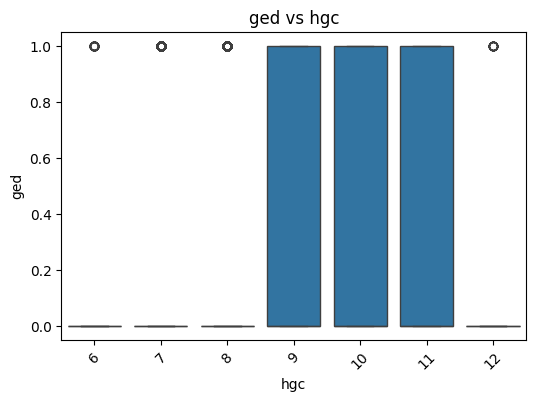

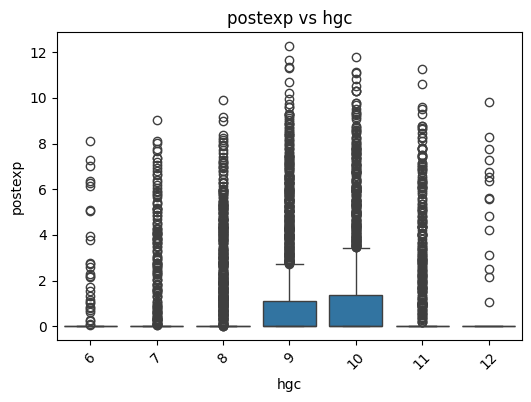

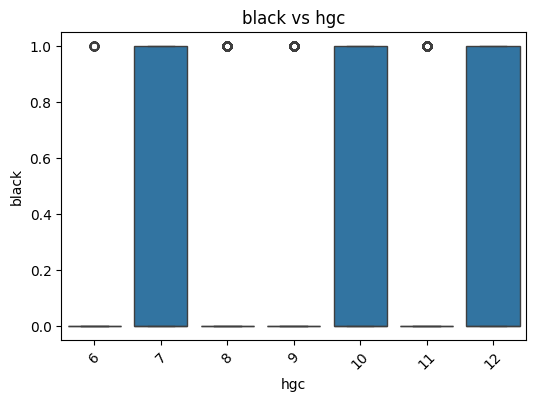

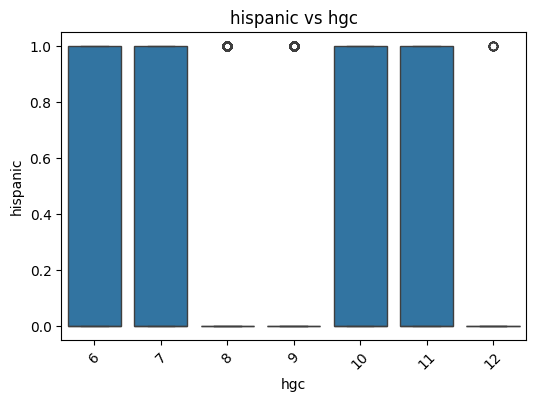

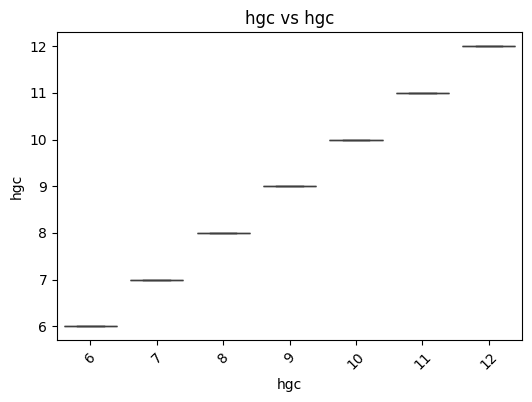

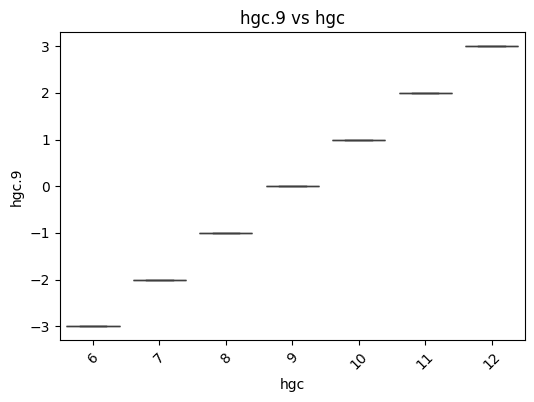

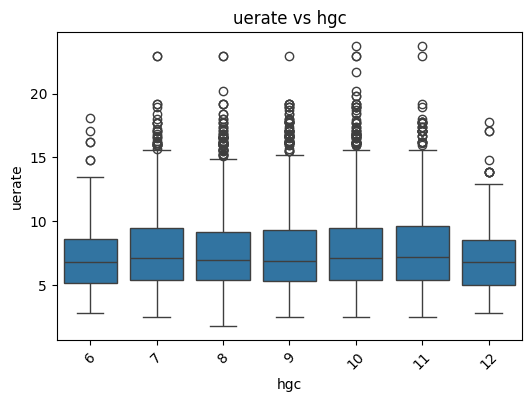

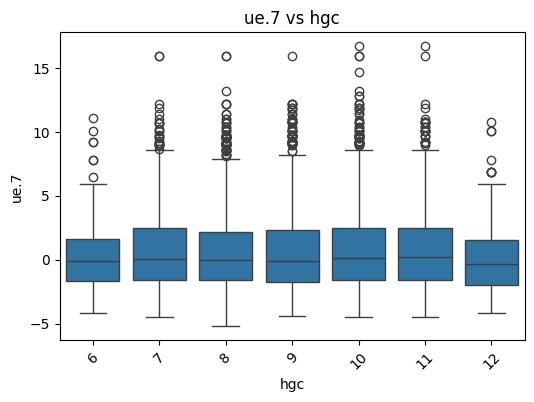

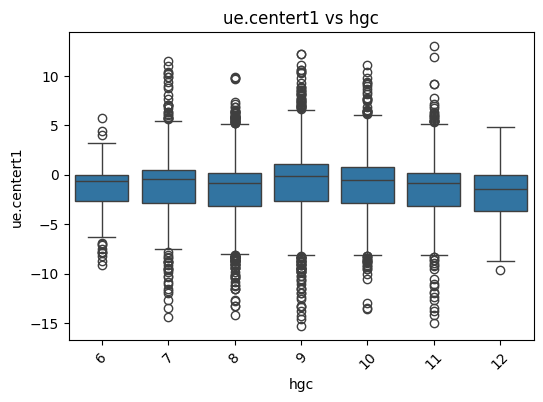

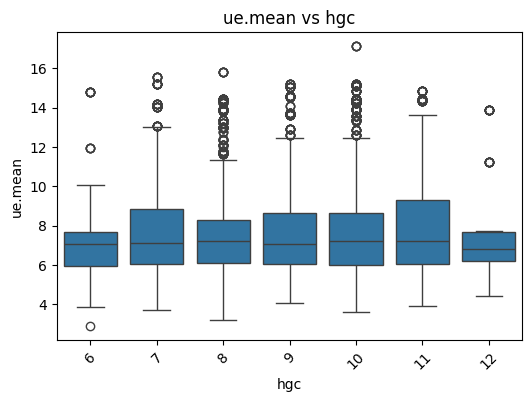

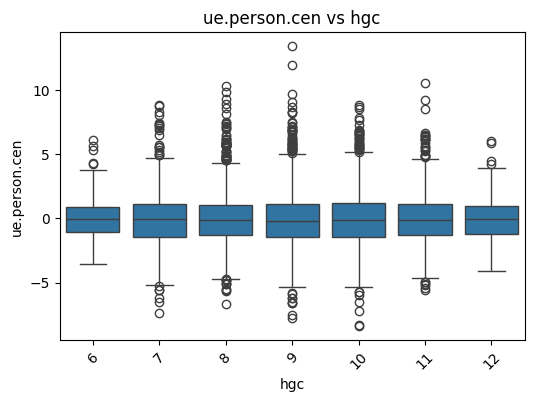

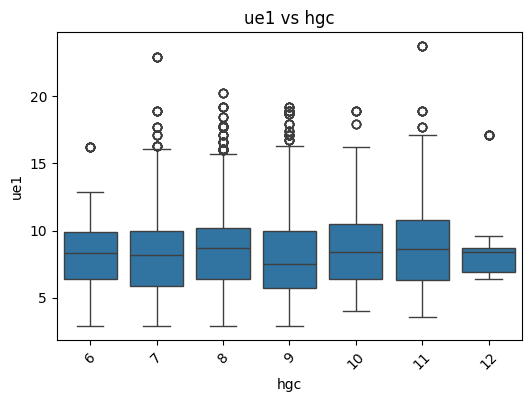

In [20]:
# Boxplot of numerical features against categorical features
for col in categorical_columns:
    for num_col in df.select_dtypes(include=['int64', 'float64']).columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=col, y=num_col, data=df)
        plt.title(f"{num_col} vs {col}")
        plt.xticks(rotation=45)
        plt.show()


In [21]:
# Cross-tabulation between categorical features
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            cross_tab = pd.crosstab(df[col1], df[col2])
            print(f"Cross-tabulation between {col1} and {col2}:\n", cross_tab, "\n")


Cross-tabulation between black and hispanic:
 hispanic     0     1
black               
0         3240  1543
1         1619     0 

Cross-tabulation between black and ged:
 ged       0     1
black            
0      3574  1209
1      1087   532 

Cross-tabulation between black and hgc:
 hgc     6    7     8     9    10   11  12
black                                    
0      162  485  1266  1238  958  601  73
1       43  171   419   336  438  177  35 

Cross-tabulation between hispanic and black:
 black        0     1
hispanic            
0         3240  1619
1         1543     0 

Cross-tabulation between hispanic and ged:
 ged          0     1
hispanic            
0         3514  1345
1         1147   396 

Cross-tabulation between hispanic and hgc:
 hgc        6    7     8     9     10   11  12
hispanic                                     
0         144  476  1297  1273  1021  554  94
1          61  180   388   301   375  224  14 

Cross-tabulation between ged and black:
 black    

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
! git clone https://github.com/vegansquirrel/EDA.git

Cloning into 'EDA'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
